In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('Data_Train.csv')
train_data.head()

train_data.isnull().sum()
train_data.shape

(10683, 11)

In [3]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [4]:
train_data.dropna(inplace=True)

In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
data = train_data.copy()
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [7]:
def change_into_datetime(column):
    data[column] = pd.to_datetime(data[column])

In [8]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [11]:
data['journey_day'] = data['Date_of_Journey'].dt.day

In [12]:
data['journey_month'] = data['Date_of_Journey'].dt.month

In [13]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2022-10-21 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-10-21 05:50:00,2022-10-21 13:15:00,7h 25m,2 stops,No info,7662,5,1


In [14]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [15]:
def hourmin(df,col):
    df[col + '_hour'] = df[col].dt.hour
    df[col + '_minute'] = df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [16]:
hourmin(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2022-10-21 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50


In [17]:
hourmin(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


In [18]:
def flight_deptime(x):
    if x> 4 and x <=8:
        return 'Early Morning'
    elif x> 8 and x <=12:
        return 'Morning'
    elif x> 12 and x <=16:
        return 'Noon'
    elif x> 16 and x <= 20:
        return 'Evening'
    elif x> 20 and x<=24:
        return 'Night'
    else:
        return 'Late Night'

<AxesSubplot:>

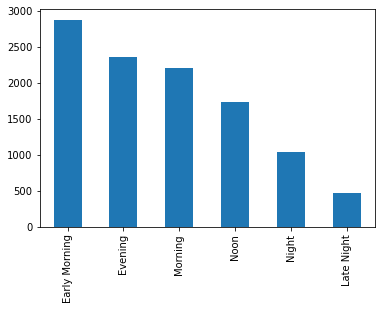

In [19]:
data['Dep_Time_hour'].apply(flight_deptime).value_counts().plot(kind='bar')

In [20]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [21]:
cf.go_offline()

In [22]:
data['Dep_Time_hour'].apply(flight_deptime).value_counts().iplot(kind='bar')

In [23]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h ' + x
    elif 'm' not in x:
        x = x + ' 0m'
    return x

In [24]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [25]:
data["Duration_hour"] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [26]:
data["Duration_minute"] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [27]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25


In [28]:
data['Duration_total_min']=data['Duration'].str.replace('h','*60').str.replace(' ', '+').str.replace('m','*1').apply(eval)

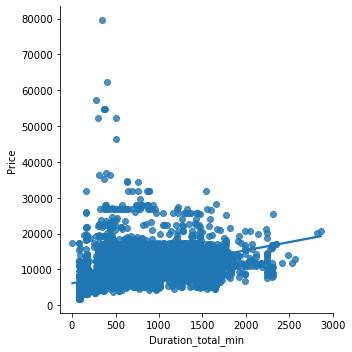

In [29]:
sns.lmplot(x='Duration_total_min', y='Price',data=data)

<AxesSubplot:ylabel='Destination'>

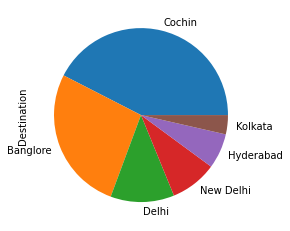

In [30]:
data['Destination'].value_counts().plot(kind='pie')

In [31]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU ? BOM ? BLR          930
DEL ? BOM ? COK          875
BLR ? BOM ? DEL          385
BLR ? DEL                382
CCU ? DEL ? BLR          300
BOM ? HYD                207
DEL ? JAI ? BOM ? COK    207
DEL ? AMD ? BOM ? COK    141
DEL ? IDR ? BOM ? COK     86
DEL ? NAG ? BOM ? COK     61
DEL ? ATQ ? BOM ? COK     38
DEL ? COK                 34
DEL ? BHO ? BOM ? COK     29
DEL ? BDQ ? BOM ? COK     28
DEL ? LKO ? BOM ? COK     25
DEL ? JDH ? BOM ? COK     23
CCU ? GAU ? BLR           22
DEL ? MAA ? BOM ? COK     16
DEL ? IXC ? BOM ? COK     13
BLR ? MAA ? DEL           10
BLR ? BDQ ? DEL            8
DEL ? UDR ? BOM ? COK      7
BOM ? DEL ? HYD            5
CCU ? BOM ? PNQ ? BLR      4
BLR ? BOM ? JDH ? DEL      3
DEL ? DED ? BOM ? COK      2
BOM ? BDQ ? DEL ? HYD      2
DEL ? CCU ? BOM ? COK      1
BOM ? VNS ? DEL ? HYD      1
BOM ? UDR ? DEL ? HYD      1
BOM ? JDH ? DEL ? HYD      1
BOM ? IDR ? DEL ? HYD      1
BOM ? DED ? DEL ? HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

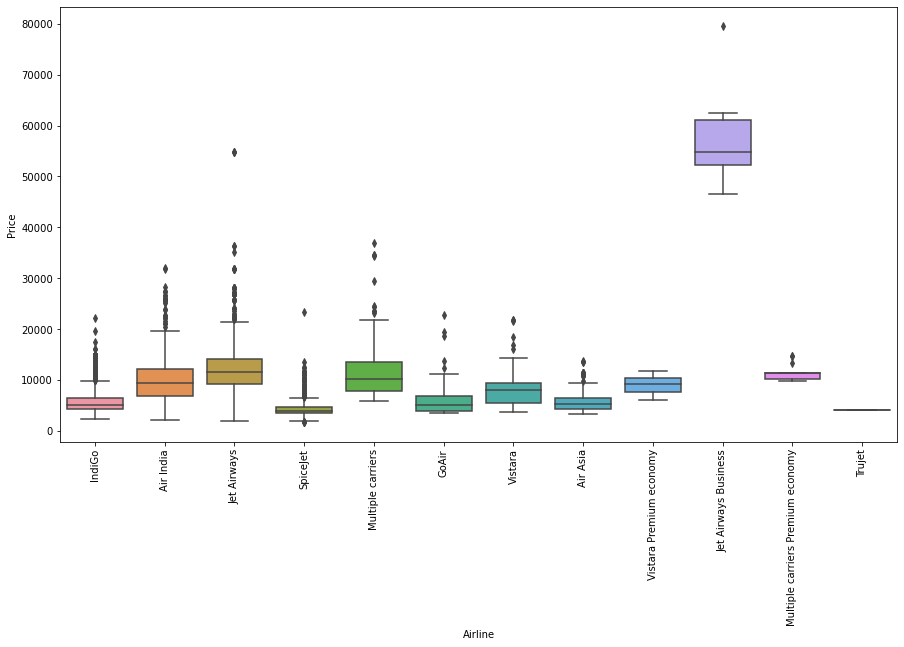

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

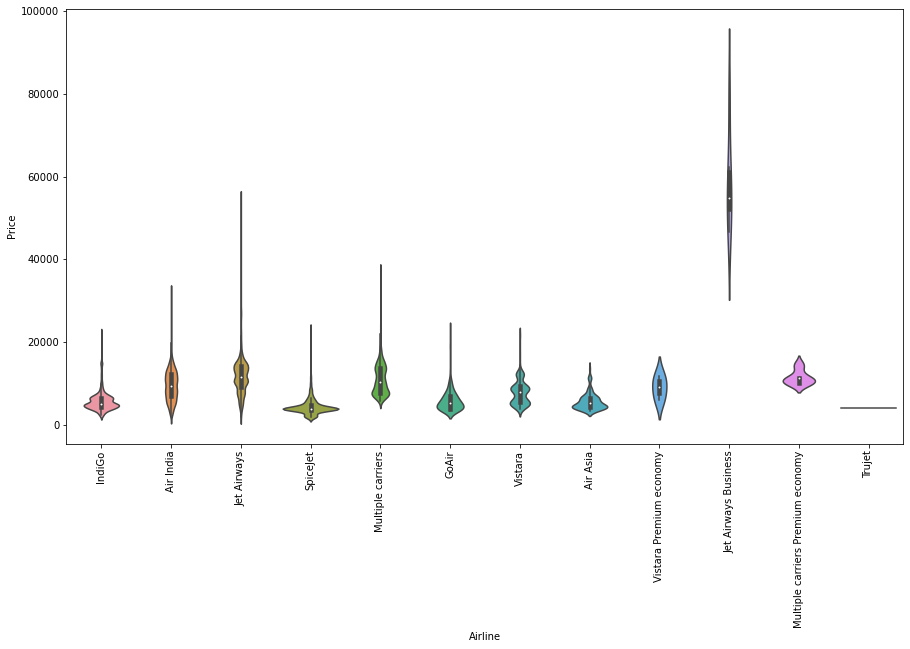

In [33]:
plt.figure(figsize=(15,8))
sns.violinplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

In [34]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25,445


In [35]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [36]:
data.drop(columns=['Additional_Info', 'Route','Duration_total_min'],axis=1,inplace=True)

In [37]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']

In [38]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [39]:
for category in data['Source'].unique():
    data['Source_'+ category] = data['Source'].apply(lambda x:1 if x==category else 0)

In [40]:
data.drop(['Source','Duration'],axis=1,inplace=True)

In [41]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Banglore,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [42]:
airlines = data.groupby('Airline')['Price'].mean().sort_values().index

In [43]:
dic1 = {key:index for index,key in enumerate(airlines,0)}
    

In [44]:
data['Airline'] = data['Airline'].map(dic1)

In [45]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Banglore,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [46]:
data['Destination'].replace('New Delhi', 'Delhi',inplace=True)

In [47]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [48]:
destination = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [49]:
dic2 = {key:index for index,key in enumerate(destination,0)}

In [50]:
data['Destination'] = data['Destination'].map(dic2)

In [51]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [52]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [53]:
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [54]:
data['Total_Stops'] = data['Total_Stops'].map(stops)

In [55]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


In [56]:
def plot(df,col):
    fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(16,16))
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)
    

C:\Users\rraj4\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\rraj4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\rraj4\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



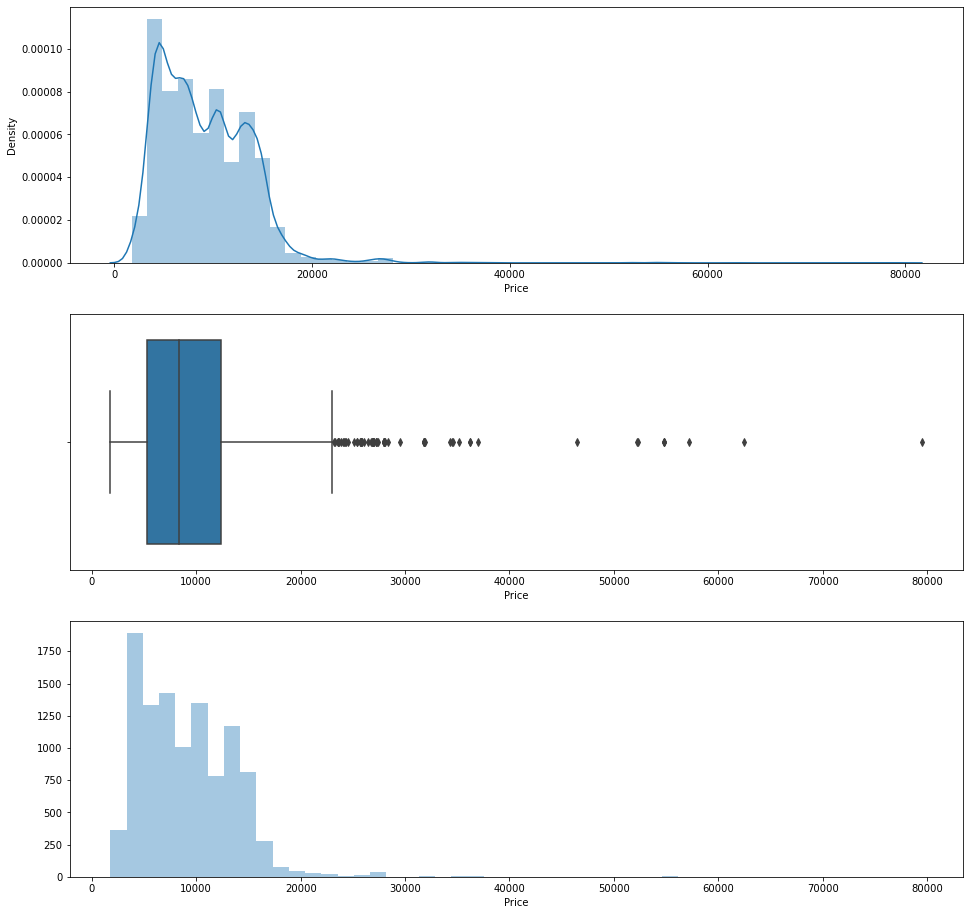

In [57]:
plot(data,'Price')

In [58]:
data['Price'] = np.where(data['Price']>35000,data['Price'].median(),data['Price'])

C:\Users\rraj4\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\rraj4\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



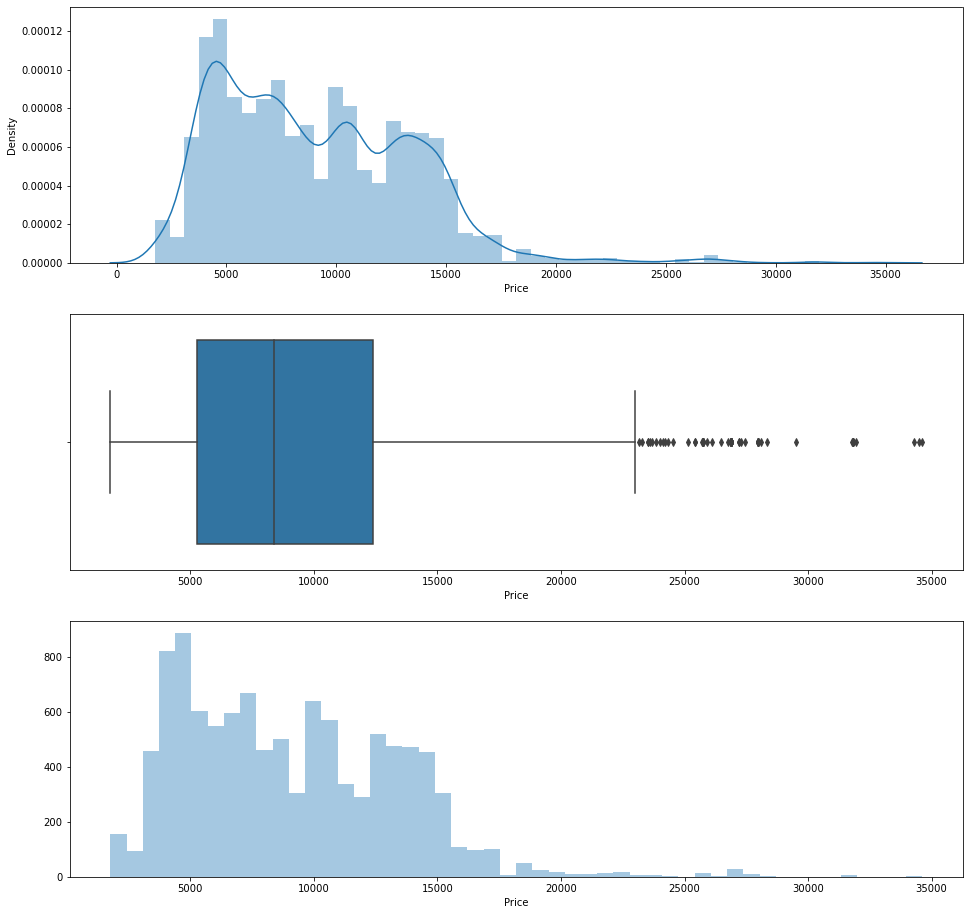

In [59]:
plot(data,'Price')

In [60]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [61]:
from sklearn.feature_selection import mutual_info_regression as p_value

In [62]:
X = data.drop(['Price'],axis=1)
y = data['Price']

In [63]:
p_value(X,y)

array([0.9784201 , 1.00303526, 0.79252829, 0.18982532, 0.23933214,
       0.33930754, 0.26225391, 0.39874026, 0.34373648, 0.46754107,
       0.34021897, 0.38319873, 0.45789372, 0.51553032, 0.13501898,
       0.19687948])

In [64]:
imp_feat = pd.DataFrame(p_value(X,y),index=X.columns)
imp_feat.columns=['Importance']
imp_feat.sort_values(by='Importance',ascending=False)

,Importance
Destination,1.005575
Airline,0.979324
Total_Stops,0.777086
Source_Delhi,0.522067
Source_Kolkata,0.465239
Duration_hour,0.462976
Arrival_Time_hour,0.403817
Source_Banglore,0.388946
Arrival_Time_minute,0.345852
Dep_Time_hour,0.343706


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
ml_model = RandomForestRegressor()
model = ml_model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [69]:
y_pred.shape

(2671,)

In [70]:
import pickle

In [71]:
file = open('random_forest.pkl','wb')

In [72]:
pickle.dump(model,file)

In [73]:
model = open('random_forest.pkl','rb')

In [74]:
forest = pickle.load(model)

In [75]:
forest.predict(x_test)

array([16759.08,  6343.95,  8793.89, ...,  3493.75,  6571.78,  6913.51])

In [76]:
def mape(y_test,y_pred):
    return np.mean(np.abs((y_test-y_pred)/y_test))*100

In [77]:
def predict(model):
    model = model.fit(x_train,y_train)
    print("Training_score : {}".format(model.score(x_train,y_train)))
    y_pred = model.predict(x_test)
    print("Predictions are : {}\n".format(y_pred))
    
    from sklearn import metrics
    r2_score = metrics.r2_score(y_test,y_pred)
    print("R2_score : {}".format(r2_score))
    print("MSE : {}".format(metrics.mean_squared_error(y_test,y_pred)))
    print("MAPE : {}".format(mape(y_test,y_pred)))
    sns.histplot(y_test-y_pred)
    

Training_score : 0.9518500427857848
Predictions are : [16753.62  6356.92  8787.22 ...  3513.52  6384.58  7122.73]

R2_score : 0.8063173159145578
MSE : 3770536.955901366
MAPE : 13.258590477460054


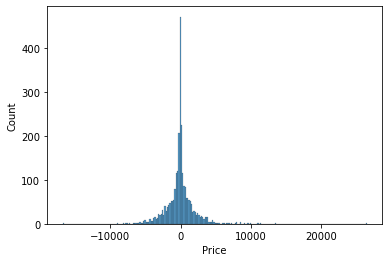

In [78]:
predict(RandomForestRegressor())